In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Cleaning

**---------------------------Data Cleaning----------------------------**

In [149]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [150]:
df.shape

(11251, 15)

In [151]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [153]:
#drop unrelated/blank columns
df.drop(['Status','unnamed1'] , axis =1, inplace= True)

In [154]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [155]:
df.dropna(inplace = True)

In [156]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [157]:
#change data type
df['Amount'] = df['Amount'].astype('int')

In [158]:
#check datatype
df['Amount'].dtypes

dtype('int32')

In [159]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [160]:
df.rename(columns = {'Marital_Status' : 'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [161]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [162]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


**-------------------------##-------------------------DATA ANALYSIS FOR INSIGHTS---------------------##--------------------**

# Exploratory Data Analysis

**------------------------------GENDER--------------------------------------**

In [163]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

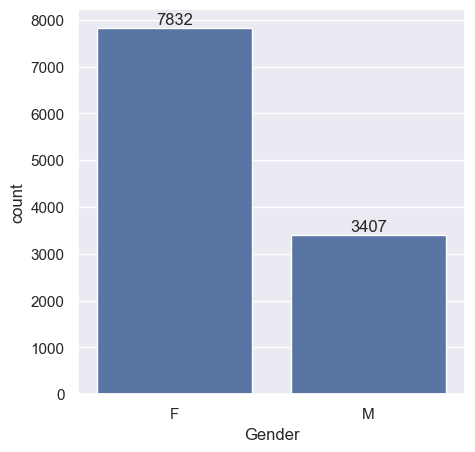

In [164]:
#count the number of customer by gender

ax = sns.countplot(x = 'Gender', data = df)
#data Labels
sns.set(rc={'figure.figsize':(10,5)})
for bars in ax.containers:
    ax.bar_label(bars)

In [165]:
df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

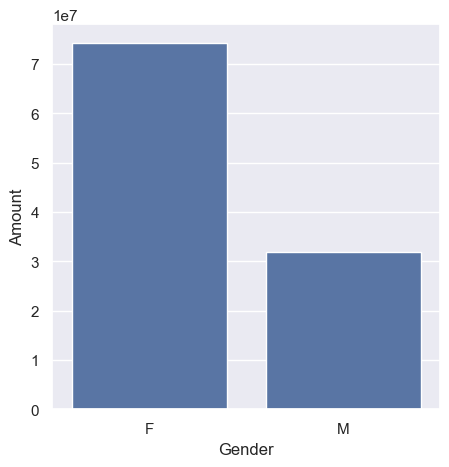

In [166]:
#total amount by Gender
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'Gender',y = 'Amount', data = sales_gen)


**--> Female customers tends to shop more than male customers in both count and amount of money spend by them.**

**------------------------------------------AGE---------------------------------------------**

In [167]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

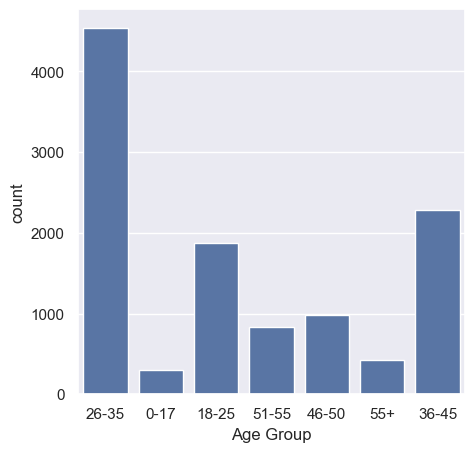

In [168]:
ax = sns.countplot(x = "Age Group", data = df)

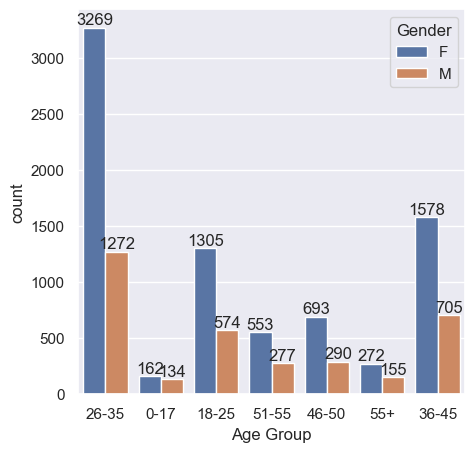

In [169]:
cx = sns.countplot(data = df , x = "Age Group" , hue = "Gender")

for bars in bx.containers:
    cx.bar_label(bars)

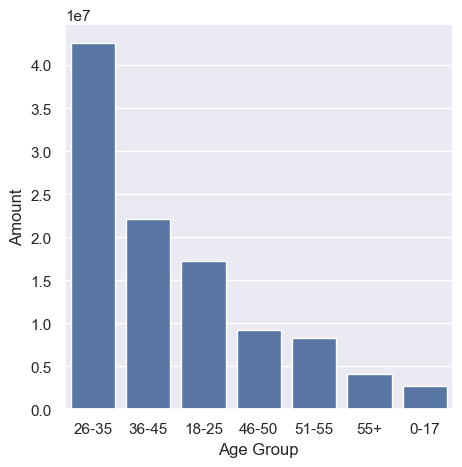

In [170]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

cv = sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

**--> Female customer between 26-35 tends to shop most.**

**--------------------------------State-----------------------------------------**


In [171]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [172]:
# total numbers of orders from states
df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending= False)

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


<Axes: xlabel='State', ylabel='Orders'>

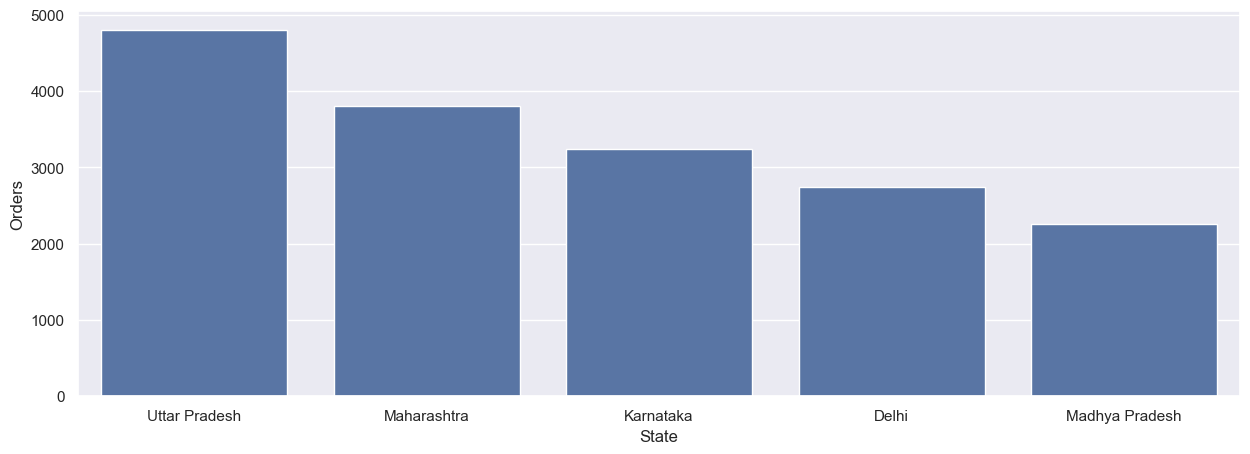

In [173]:
# total numbers of orders from top 5 states
ax = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending= False).head(5)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = ax, x = 'State', y = 'Orders')

In [174]:
# total numbers of amount from states
df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


<Axes: xlabel='State', ylabel='Amount'>

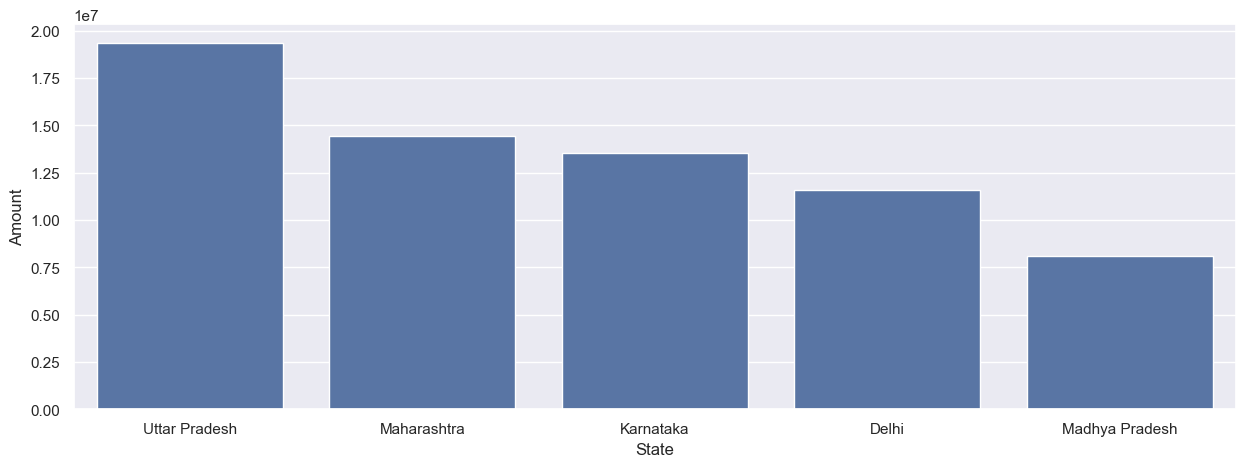

In [175]:
# total numbers of amount from top 5 states
ax = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending= False).head(5)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = ax, x = 'State', y = 'Amount')

**--> The most of the orders and total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka**

**----------------------------------Martial Status---------------------------------**

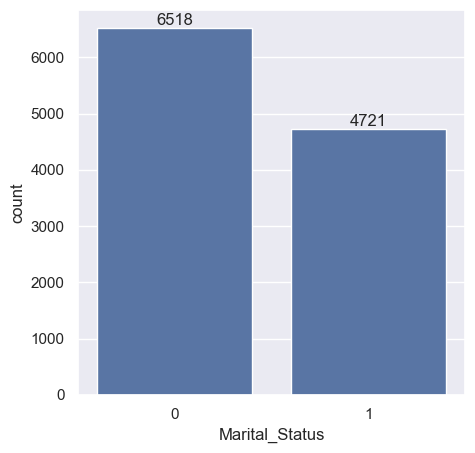

In [193]:
#Number of single and married customers
a = sns.countplot(data = df, x = "Marital_Status")

sns.set(rc={'figure.figsize':(15,5)})
for bars in a.containers:
    a.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

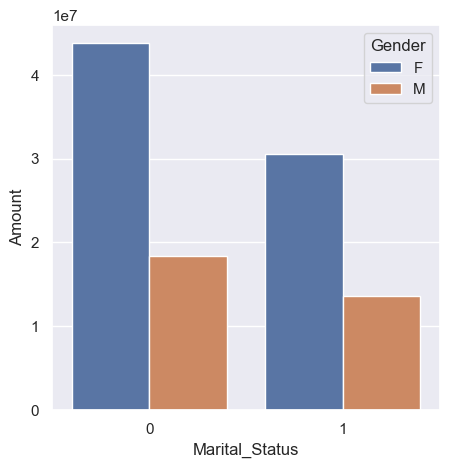

In [194]:
#Amount spent by Marital Status and Gender
b = df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'Marital_Status', data = b, hue = 'Gender', y = 'Amount')

<Axes: xlabel='Marital_Status', ylabel='Orders'>

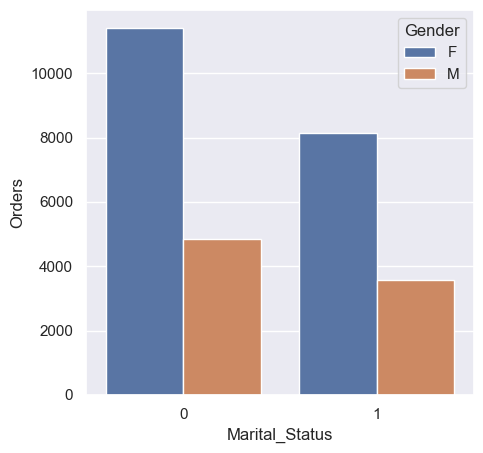

In [178]:
#Orders by Marital Status and Gender
b = df.groupby(['Marital_Status','Gender'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'Marital_Status', data = b, hue = 'Gender', y = 'Orders')

**-->The total amount and most orders are done by married female, followed by single female.**

**-------------------------------------Occupation-----------------------------------------**

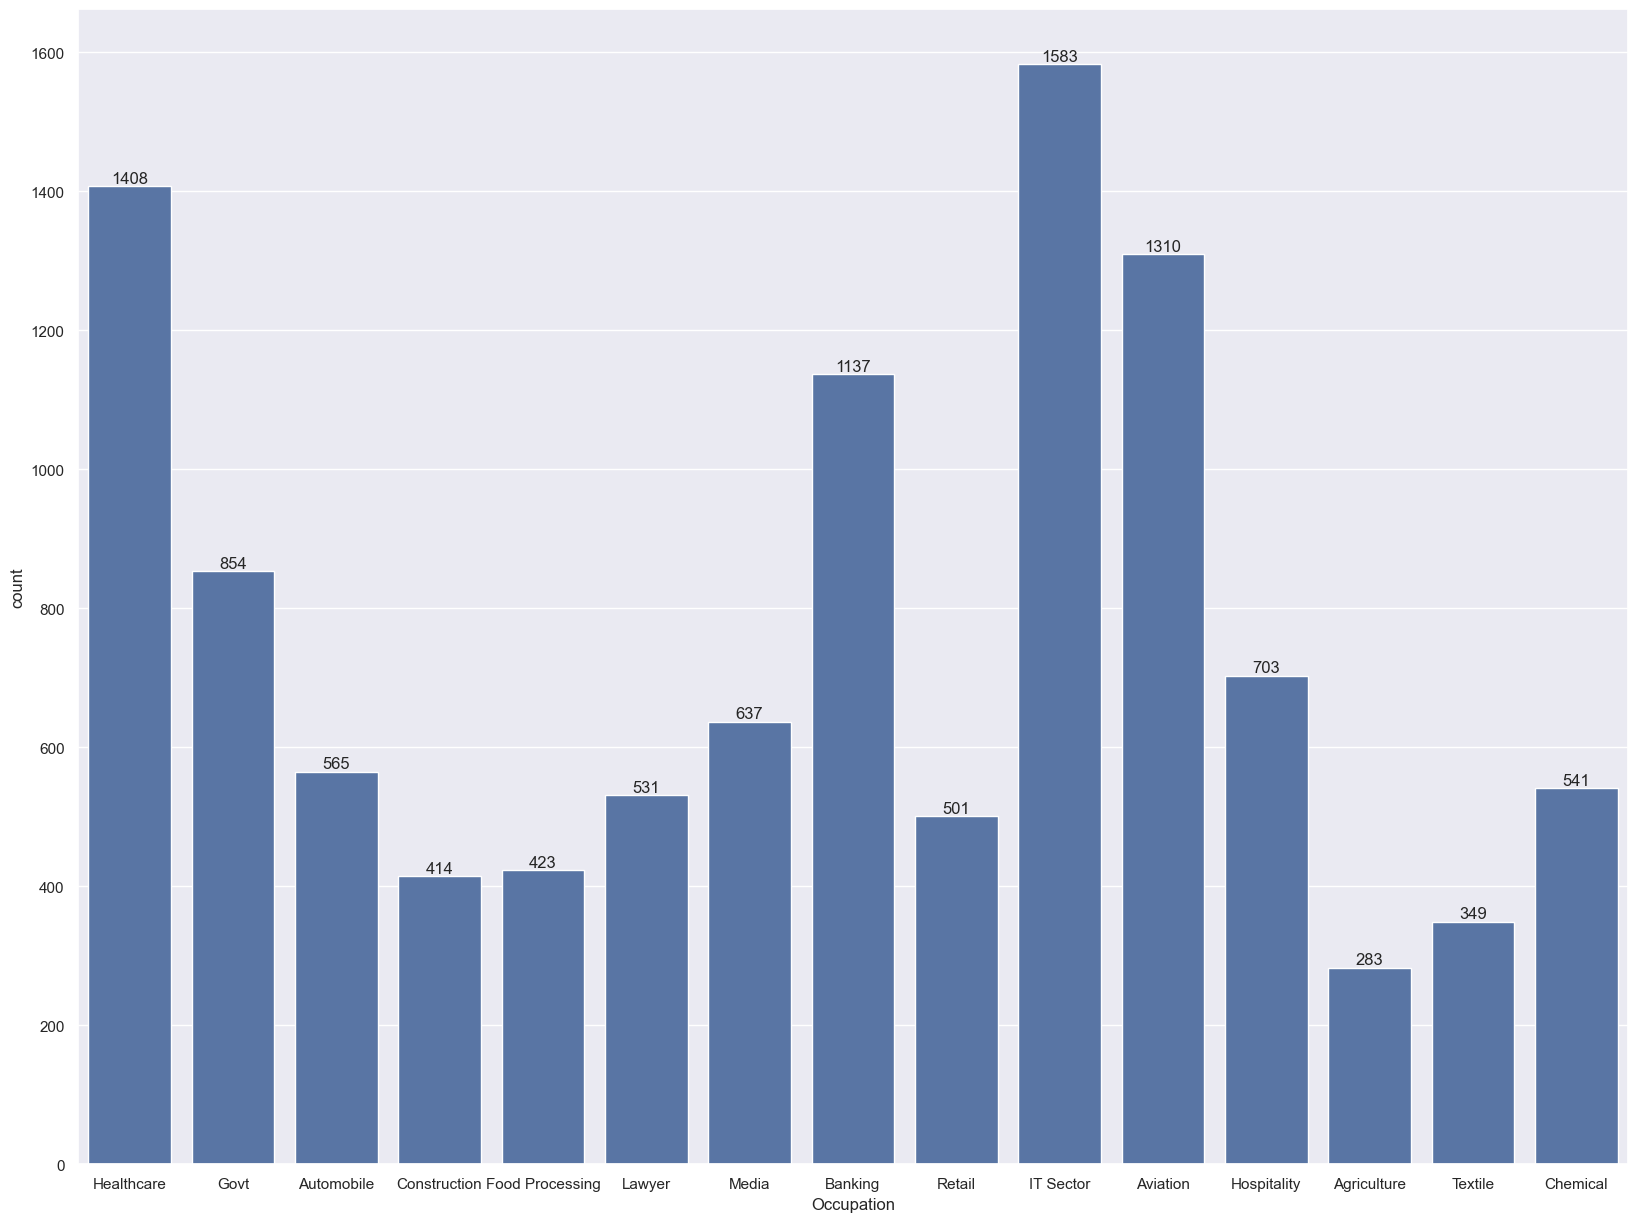

In [201]:
#count of customers by occupations
a = sns.countplot(data = df, x = 'Occupation')

sns.set(rc={'figure.figsize':(20,10)})
for bars in a.containers:
    a.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

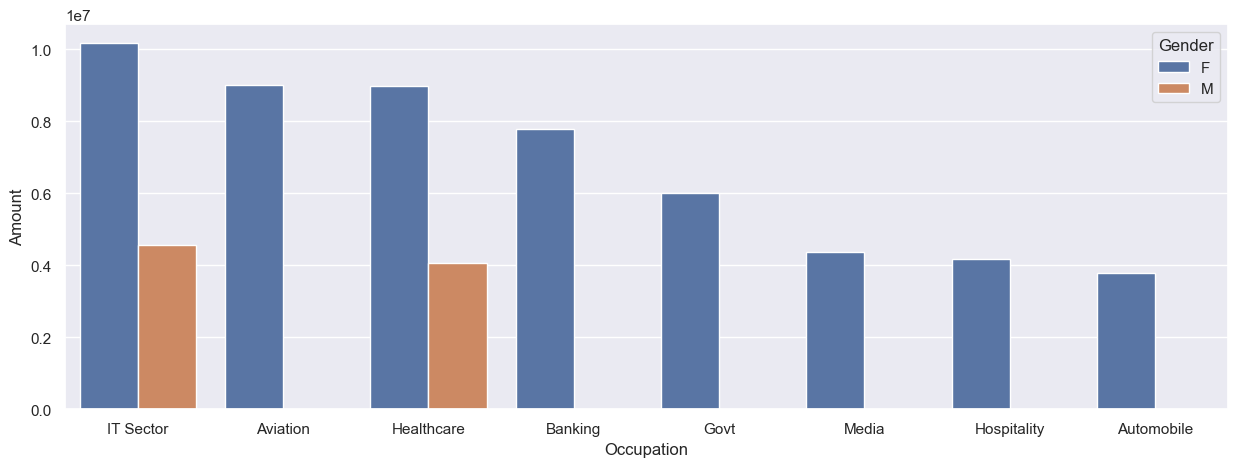

In [191]:
#Total amount spent by customers based on occupation
b = df.groupby(['Occupation','Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'Occupation', y = 'Amount', data = b, hue = "Gender")

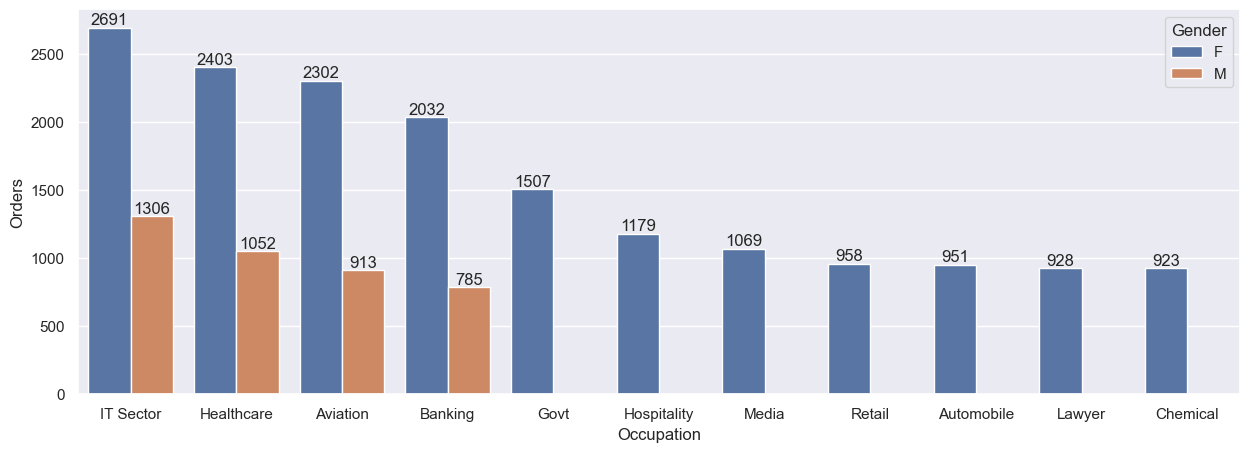

In [181]:
#Total Orders spent by customers based on occupation
b = df.groupby(['Occupation','Gender'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(15)
sns.set(rc={'figure.figsize':(15,5)})
a = sns.barplot(x = 'Occupation', y = 'Orders', data = b, hue = "Gender")
for bars in a.containers:
    a.bar_label(bars)

**--> The most amount and orders are done by female from IT Sector.**

**--> The most customers from IT Sector,Heath Care and Aviation.**

**-------------------------------------Product Category-----------------------------------------**

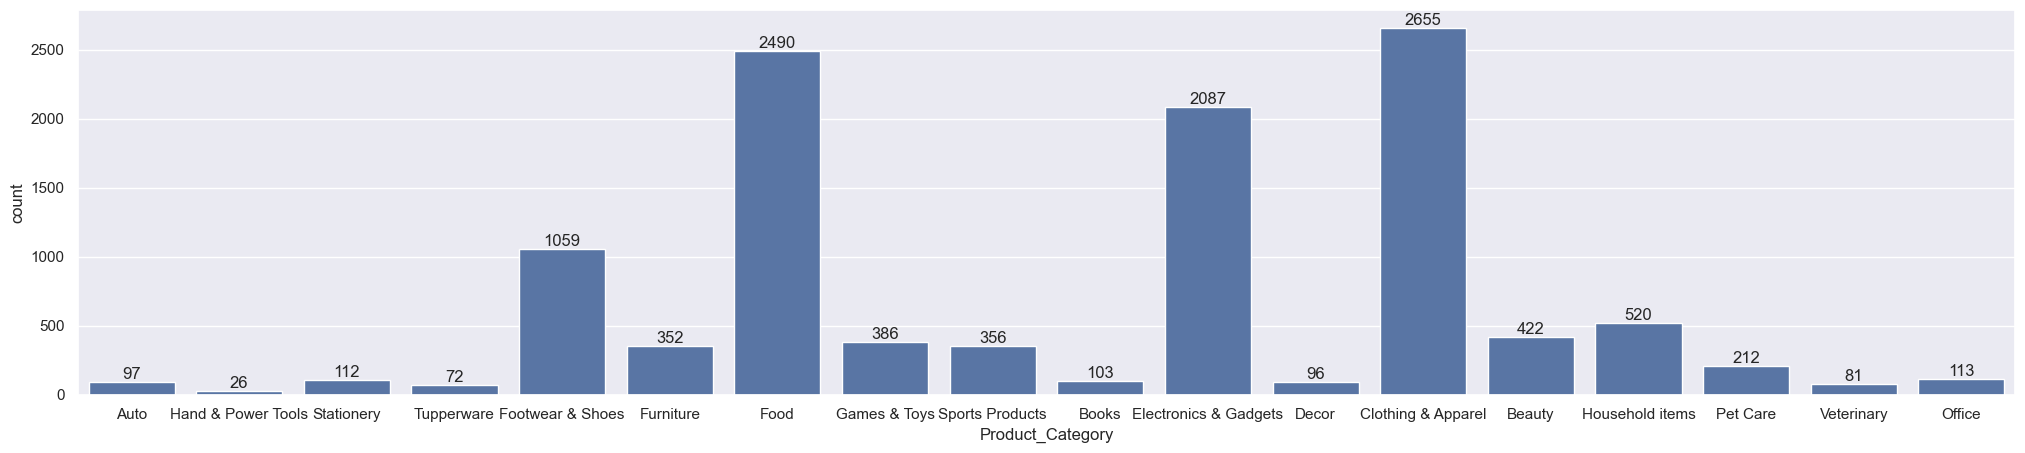

In [213]:
#count of orders by Product Category
a = sns.countplot(data = df, x = 'Product_Category')

sns.set(rc={'figure.figsize':(30,5)})
for bars in a.containers:
    a.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

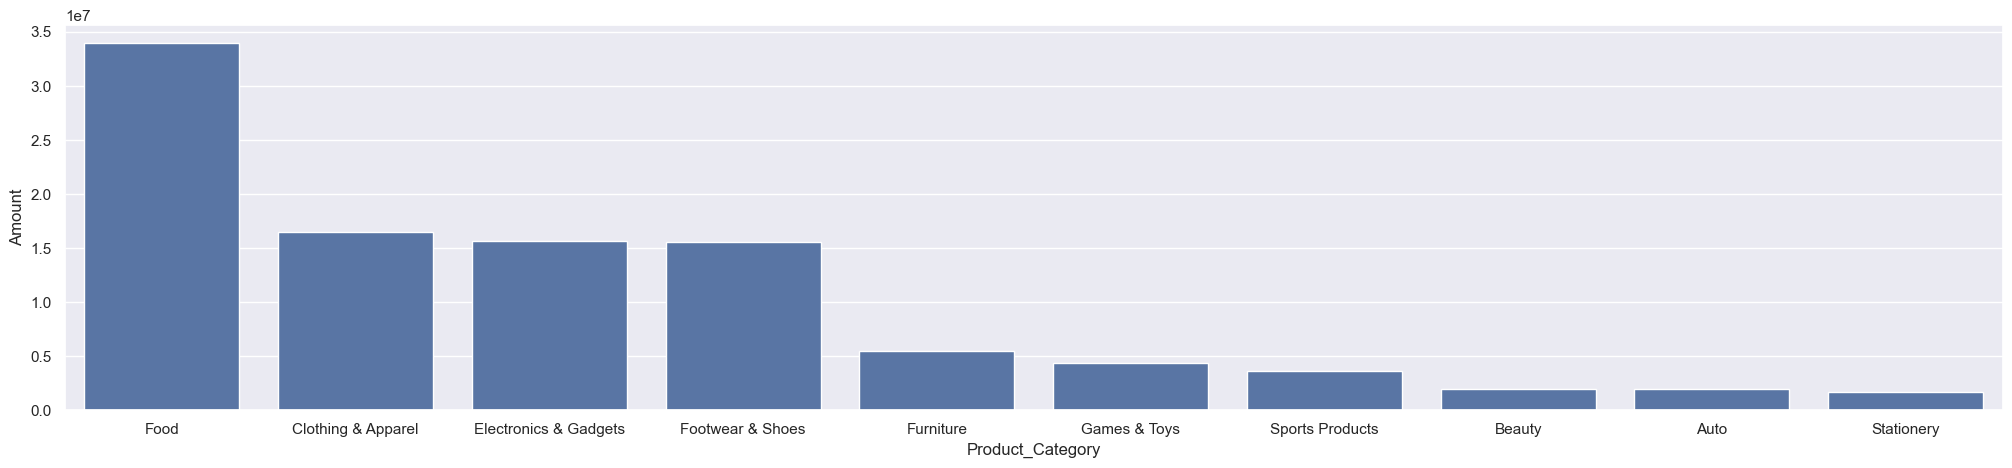

In [211]:
#Total amount spent by customers based on Product_Category
b = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x = 'Product_Category', y = 'Amount', data = b)

<Axes: xlabel='Product_Category', ylabel='Orders'>

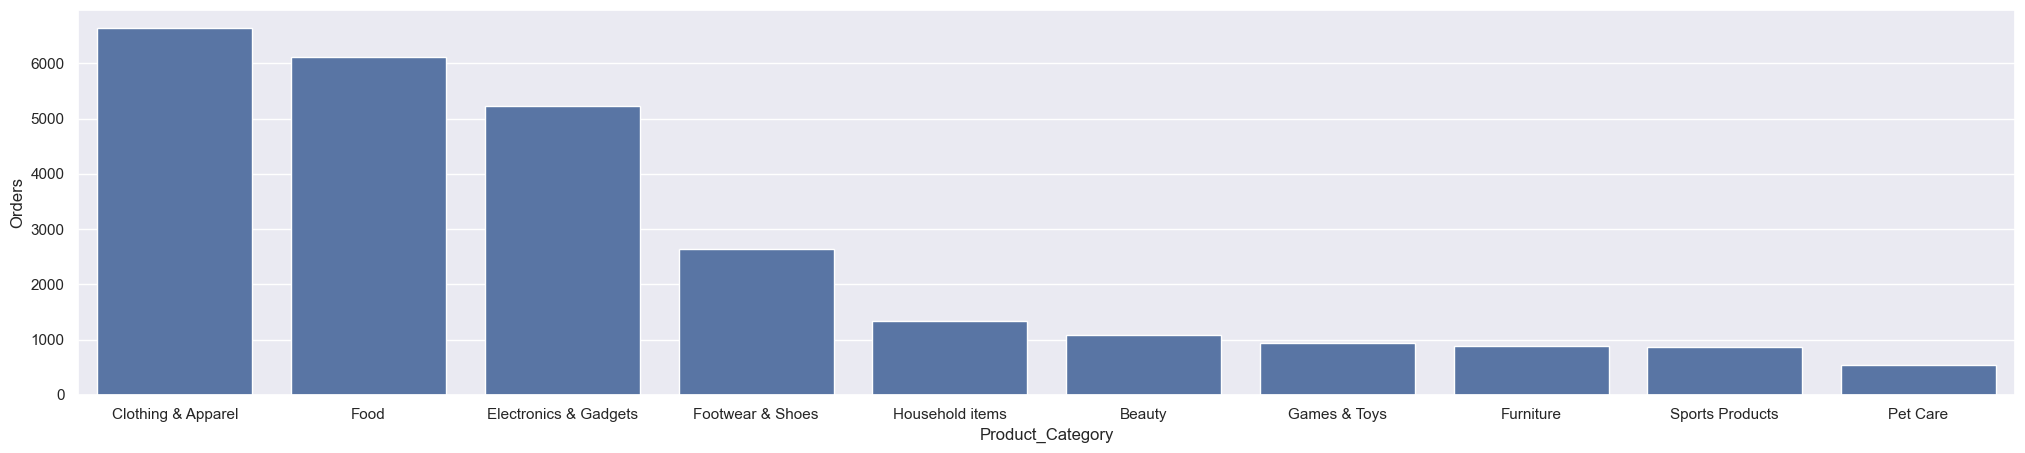

In [212]:
#Total Orders done by customers based on Product_Category
b = df.groupby(['Product_Category'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x = 'Product_Category', y = 'Orders', data = b)

**--> 01. The most orders are done om clothing & Apparel, Food and Footwear & Shoes.**
    

  **02. The most amount/ Sales were on food, clothing & Apparel and Electronics & Gadgets.**

**---------------------------------Product-----------------------------------**

<Axes: xlabel='Product_ID', ylabel='Orders'>

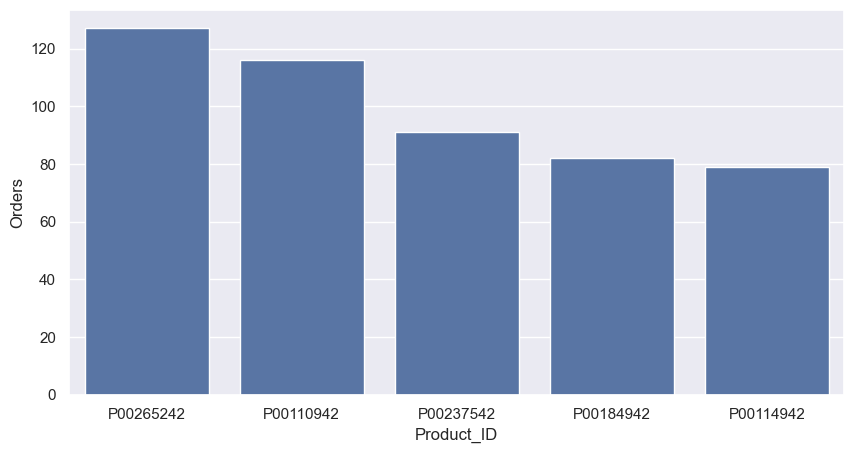

In [216]:
#Total Orders based on Product ID
b = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(5)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x = 'Product_ID', y = 'Orders', data = b)

**-------------------------------------------CONCLUSION--------------------------------------------------**

**Married women between age group of 26-35 from UP, Maharashtra and Karnataka working in IT , Heathcare and Aviation are more likely to buy products from Food clothing and Electronic Category.**